In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import netCDF4
import xarray as xr
import math

In [2]:
#1.1
# 读取大气二氧化碳浓度数据
data1 = pd.read_csv('co2_annmean_mlo.csv')
filtered_data_N1 = data1[(data1['year'] >= 1986) & (data1['year'] <= 2004)]

# 加载并筛选人为源排放数据
data2 = pd.read_csv('global.1751_2014.csv')
data2['year'] = data2['year'].astype(int)
filtered_data_E = data2[(data2['year'] >= 1985) & (data2['year'] <= 2004)]

# 筛选出需要的列，并且确保二氧化碳排放数据单位为pg
filtered_data_E = filtered_data_E.iloc[1:, 0:2]  # 去掉第一行，选择年份和排放量列
filtered_data_E['Total C emission in pg'] = filtered_data_E['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] / 1000  # 转换为pg

# 合并两个数据框，确保年份对齐
data = pd.merge(filtered_data_N1[['year', 'mean']], filtered_data_E[['year', 'Total C emission in pg']], on='year', how='inner')

# 添加大气二氧化碳浓度（ppm）列
data['Atmosphere C'] = data['mean']
data['CO2 level in ppm (no buff)'] = 347  
data = data.drop(columns=['mean'])
# 查看合并后的数据
data


,year,Total C emission in pg,Atmosphere C,CO2 level in ppm (no buff)
0,1986,5.583,347.61,347
1,1987,5.725,349.31,347
2,1988,5.936,351.69,347
3,1989,6.066,353.20,347
4,1990,6.074,354.45,347
5,1991,6.142,355.70,347
6,1992,6.078,356.54,347
7,1993,6.070,357.21,347
8,1994,6.174,358.96,347
9,1995,6.305,360.97,347


In [3]:
# 参数定义
k12 = 105 / 740  # 从大气到海洋的碳交换系数
k21 = 102 / 900  # 从海洋到大气的碳交换系数

# 初始条件
N1 = 740  # 1986年大气二氧化碳浓度（pgc）
N2 = 900  # 海洋初始二氧化碳浓度（PgC）
N0=740*10**21/12/347 #大气mol
gama=data['Total C emission in pg'] #人为源排放

# 时间范围：1987到2004年
year=1987

#运算
for year in range(1986,2005):
    dN1 = -k12*N1 + k21*N2 + gama[year-1986]
    dN2 =  k12*N1 - k21*N2
    N1 += dN1
    N2 += dN2
    if year != 1986:
        data['CO2 level in ppm (no buff)'][year-1986]=N1*10**21/12/N0


data


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6828\48939162.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['CO2 level in ppm (no buff)'][year-1986]=N1*10**21/12/N0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6828\489

,year,Total C emission in pg,Atmosphere C,CO2 level in ppm (no buff)
0,1986,5.583,347.61,347.000000
1,1987,5.725,349.31,349.476592
2,1988,5.936,351.69,350.822203
3,1989,6.066,353.20,352.200804
4,1990,6.074,354.45,353.553674
5,1991,6.142,355.70,354.915942
6,1992,6.078,356.54,356.226925
7,1993,6.070,357.21,357.522571
8,1994,6.174,358.96,358.858888
9,1995,6.305,360.97,360.243684


In [4]:
#1.2
import pandas as pd
# 读取大气二氧化碳浓度数据
data1 = pd.read_csv('co2_annmean_mlo.csv')
filtered_data_N1 = data1[(data1['year'] >= 1986) & (data1['year'] <= 2004)]

# 加载并筛选人为源排放数据
data2 = pd.read_csv('global.1751_2014.csv')
data2['year'] = data2['year'].astype(int)
filtered_data_E = data2[(data2['year'] >= 1985) & (data2['year'] <= 2004)]

# 筛选出需要的列，并且确保二氧化碳排放数据单位为pg
filtered_data_E = filtered_data_E.iloc[1:, 0:2]  # 去掉第一行，选择年份和排放量列
filtered_data_E['Total C emission in pg'] = filtered_data_E['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] / 1000  # 转换为pg

# 合并两个数据框，确保年份对齐
data = pd.merge(filtered_data_N1[['year', 'mean']], filtered_data_E[['year', 'Total C emission in pg']], on='year', how='inner')

# 添加大气二氧化碳浓度（ppm）列
data['Atmosphere C'] = data['mean'] 
data = data.drop(columns=['mean'])
data['CO2 level in ppm (no buff)'] = 347 
data['CO2 level in ppm (in buff)'] =347
# 参数定义
k12 = 105 / 740  # 从大气到海洋的碳交换系数
k21 = 102 / 900  # 从海洋到大气的碳交换系数

# 初始条件
N1 = 740  # 1986年大气二氧化碳浓度（pgc）
N2 = 900  # 海洋初始二氧化碳浓度（PgC）
N20= 821  # 海洋中二氧化碳平衡值
N0=740*10**21/12/347 #大气mol
gama=data['Total C emission in pg'] #人为源排放
year=1986


#运算
for year in range(1986,2005):
    dN1 = -k12*N1 + k21*N2 + gama[year-1986]
    dN2 =  k12*N1 - k21*N2
    N1 += dN1
    N2 += dN2
    if year != 1986:
        data['CO2 level in ppm (no buff)'][year-1986]=N1*10**21/12/N0
        
for year in range(1986,2005):
    if year == 1986:
         ksi=3.69+1.86*10**(-2)*data['CO2 level in ppm (in buff)'][year-1986]-1.8*10**(-6)*data['CO2 level in ppm (in buff)'][year-1986]**2
    
    dN1 = -k12*N1 + k21*N20+k21*ksi*(N2-N20) + gama[year-1986]
    dN2 =  k12*N1 - k21*N20-k21*ksi*(N2-N20)
    N1 += dN1
    N2 += dN2
    
    if year != 1986:
        data['CO2 level in ppm (in buff)'][year-1986]=N1*10**21/12/N0
    ksi=3.69+1.86*10**(-2)*data['CO2 level in ppm (in buff)'][year-1986]-1.8*10**(-6)*data['CO2 level in ppm (in buff)'][year-1986]**2
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6828\2027750134.py:44: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['CO2 level in ppm (no buff)'][year-1986]=N1*10**21/12/N0
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6828\2

,year,Total C emission in pg,Atmosphere C,CO2 level in ppm (no buff),CO2 level in ppm (in buff)
0,1986,5.583,347.61,347.000000,347.000000
1,1987,5.725,349.31,349.476592,427.500787
2,1988,5.936,351.69,350.822203,437.706083
3,1989,6.066,353.20,352.200804,437.238490
4,1990,6.074,354.45,353.553674,441.139134
5,1991,6.142,355.70,354.915942,443.253726
6,1992,6.078,356.54,356.226925,446.099681
7,1993,6.070,357.21,357.522571,448.623968
8,1994,6.174,358.96,358.858888,451.336208
9,1995,6.305,360.97,360.243684,454.046177


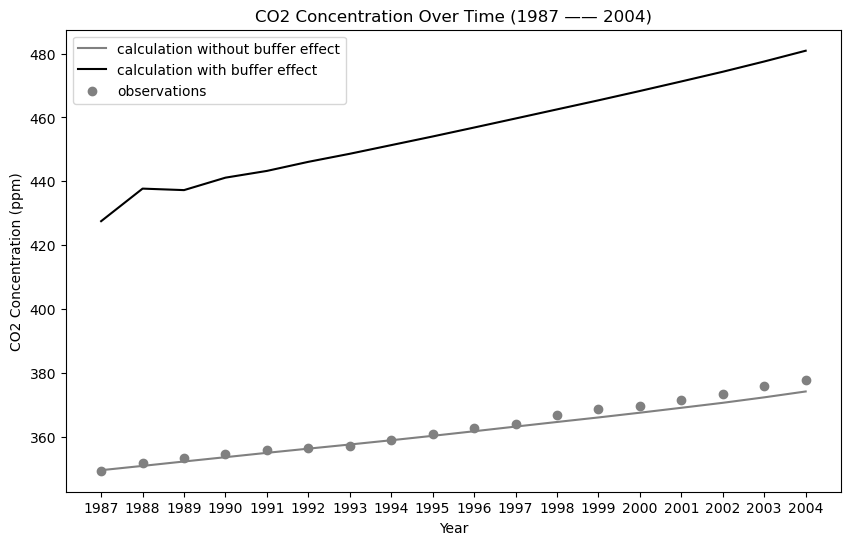

In [5]:
#1.3
import matplotlib.pyplot as plt

# 筛选1987年及以后的数据
data_1987_plus = data[data['year'] >= 1987]

# 创建一个新的图表
plt.figure(figsize=(10, 6))

# 绘制不考虑缓冲效应的计算结果
plt.plot(data_1987_plus['year'], data_1987_plus['CO2 level in ppm (no buff)'], label='calculation without buffer effect', color='gray')

# 绘制考虑缓冲效应的计算结果
plt.plot(data_1987_plus['year'], data_1987_plus['CO2 level in ppm (in buff)'], label='calculation with buffer effect', color='black')

# 绘制观测值
plt.scatter(data_1987_plus['year'], data_1987_plus['Atmosphere C'], label='observations', color='gray')

# 添加标题和标签
plt.title('CO2 Concentration Over Time (1987 —— 2004)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.xticks(range(1987, data_1987_plus['year'].max() + 1, 1))
# 添加图例
plt.legend()

# 显示图表
plt.show()

In [6]:
#bonus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# 读取数据
#为了数据对齐，根据规律将全球排放增加1950年数据
data_emissions = pd.read_csv('global.1751_2014.csv')
data_emissions = data_emissions[(data_emissions['year'] >= 1750) & (data_emissions['year'] <= 2000)]

delta = pd.read_csv('Global_land-use_flux-1850_2005.csv')
delta = delta[(delta['year'] >= 1750) & (delta['year'] <= 2000)]

observation = pd.read_csv('atmospheric-carbon-dioxide-concentration.csv')
observation = observation[(observation['year'] >= 1750) & (observation['year'] <= 2000)]

# 合并数据
data = pd.merge(data_emissions[['year', 'Total carbon emissions (in pg)']], delta[['year', 'Global land use in pg']], on='year')
data['CO2 level in ppm (beta = 0.38)'] = 289
data['CO2 level in ppm (beta = 0.50)'] = 289
data

,year,Total carbon emissions (in pg),Global land use in pg,CO2 level in ppm (beta = 0.38),CO2 level in ppm (beta = 0.50)
0,1750,0.003,0.200000,289,289
1,1751,0.003,0.203006,289,289
2,1752,0.003,0.206012,289,289
3,1753,0.003,0.209018,289,289
4,1754,0.003,0.212024,289,289
...,...,...,...,...,...
246,1996,6.448,1.531300,289,289
247,1997,6.556,1.491300,289,289
248,1998,6.576,1.487200,289,289
249,1999,6.561,1.449200,289,289


In [7]:
import pandas as pd
import numpy as np
import math

# 读取数据并从1950年开始筛选
data_emissions = pd.read_csv('global.1751_2014.csv')
data_emissions = data_emissions[(data_emissions['year'] >= 1750) & (data_emissions['year'] <= 2000)]

delta = pd.read_csv('Global_land-use_flux-1850_2005.csv')
delta = delta[(delta['year'] >= 1750) & (delta['year'] <= 2000)]

# 合并数据
data1 = pd.merge(data_emissions[['year', 'Total carbon emissions (in pg)']], delta[['year', 'Global land use in pg']], on='year')

# 初始条件
beta = 0.38
P0 = 289
f0 = 62

N1 = 615
N2 = 842
N3 = 9744
N4 = 26280
N5 = 90000000
N6 = 731
N7 = 1238
N20 = 842
N0 = 740 * 10**21 / 12 / 347

k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328

# 初始CO2水平设为289（1750年）
initial_co2_level = 289

# 生成年份范围
years = range(1750, 2001)

# 循环处理每一年
for year in years:
    # 获取当前年的排放和土地使用数据
    row_emissions = data_emissions[data_emissions['year'] == year]
    row_delta = delta[delta['year'] == year]
    
    if not row_emissions.empty and not row_delta.empty:
        gama = row_emissions['Total carbon emissions (in pg)'].values[0]
        delta_value = row_delta['Global land use in pg'].values[0]
        
        # 计算CO2水平
        if year != 1750:
          ksi = 3.69 + 1.86 * 10**(-2) * co2_level - 1.8 * 10**(-6) * co2_level**2
          f = f0 * (1 + beta * math.log(co2_level / P0))

        # 计算各状态变量的变化
          dN1 = -k12 * N1 + k21 * (N20 + ksi * (N2 - N20)) + gama - f + delta_value + k71 * N7 + k51 * N5
          dN2 = k12 * N1 - k21 * (N2 + ksi * (N2 - N20)) - k23 * N2 + k32 * N3 - k24 * N2
          dN3 = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
          dN4 = k24 * N2 + k34 * N3 - k43 * N4 - k45 * N4
          dN5 = k45 * N4 - k51 * N5
          dN6 = f - k67 * N6 - 2 * delta_value
          dN7 = k67 * N6 - k71 * N7 + delta_value

        # 更新状态变量
          N1 += dN1
          N2 += dN2
          N3 += dN3
          N4 += dN4
          N5 += dN5
          N6 += dN6
          N7 += dN7

        # 更新CO2水平
          co2_level = (N1 * 10**21 / 12 / N0)
        if year == 1750:
          co2_level =initial_co2_level
        # 存储结果到data1
        data1.loc[data1['year'] == year, 'CO2 level in ppm (beta = 0.38)'] = co2_level

# 输出结果
print(data1[['year', 'CO2 level in ppm (beta = 0.38)']])


     year  CO2 level in ppm (beta = 0.38)
0    1750                      289.000000
1    1751                      286.605212
2    1752                      285.188709
3    1753                      283.948302
4    1754                      282.851979
..    ...                             ...
246  1996                      348.607680
247  1997                      349.816186
248  1998                      350.998437
249  1999                      352.126248
250  2000                      353.291763

[251 rows x 2 columns]


In [8]:
import pandas as pd
import numpy as np
import math

# 读取数据并从1950年开始筛选
data_emissions = pd.read_csv('global.1751_2014.csv')
data_emissions = data_emissions[(data_emissions['year'] >= 1750) & (data_emissions['year'] <= 2000)]

delta = pd.read_csv('Global_land-use_flux-1850_2005.csv')
delta = delta[(delta['year'] >= 1750) & (delta['year'] <= 2000)]

# 合并数据
data2 = pd.merge(data_emissions[['year', 'Total carbon emissions (in pg)']], delta[['year', 'Global land use in pg']], on='year')

# 初始条件
beta = 0.5  # 修改beta值为0.5
P0 = 289  # P0 作为初始CO2水平
f0 = 62

N1 = 615
N2 = 842
N3 = 9744
N4 = 26280
N5 = 90000000
N6 = 731
N7 = 1238
N20 = 842
N0 = 740 * 10**21 / 12 / 347

k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328


# 生成年份范围
years = range(1750, 2001)

# 循环处理每一年
for year in years:
    # 获取当前年的排放和土地使用数据
    row_emissions = data_emissions[data_emissions['year'] == year]
    row_delta = delta[delta['year'] == year]
    
    if not row_emissions.empty and not row_delta.empty:
        gama = row_emissions['Total carbon emissions (in pg)'].values[0]
        delta_value = row_delta['Global land use in pg'].values[0]
        
        # 1950年初始值为P0
        if year != 1750:
        
        # 计算模型中的ksi和f
          ksi = 3.69 + 1.86 * 10**(-2) * co2_level - 1.8 * 10**(-6) * co2_level**2
          f = f0 * (1 + beta * math.log(co2_level / P0))

        # 计算各状态变量的变化
          dN1 = -k12 * N1 + k21 * (N20 + ksi * (N2 - N20)) + gama - f + delta_value + k71 * N7 + k51 * N5
          dN2 = k12 * N1 - k21 * (N2 + ksi * (N2 - N20)) - k23 * N2 + k32 * N3 - k24 * N2
          dN3 = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
          dN4 = k24 * N2 + k34 * N3 - k43 * N4 - k45 * N4
          dN5 = k45 * N4 - k51 * N5
          dN6 = f - k67 * N6 - 2 * delta_value
          dN7 = k67 * N6 - k71 * N7 + delta_value

        # 更新状态变量
          N1 += dN1
          N2 += dN2
          N3 += dN3
          N4 += dN4
          N5 += dN5
          N6 += dN6
          N7 += dN7

        # 更新CO2水平
          co2_level = (N1 * 10**21 / 12 / N0)
        if year == 1750:
           co2_level = P0
        # 存储结果到data2
        data2.loc[data2['year'] == year, 'CO2 level in ppm (beta = 0.50)'] = co2_level

# 输出结果
print(data2[['year', 'CO2 level in ppm (beta = 0.50)']])


     year  CO2 level in ppm (beta = 0.50)
0    1750                      289.000000
1    1751                      286.605212
2    1752                      285.217739
3    1753                      284.019329
4    1754                      282.975602
..    ...                             ...
246  1996                      342.942463
247  1997                      344.023967
248  1998                      345.079066
249  1999                      346.079959
250  2000                      347.119443

[251 rows x 2 columns]


In [9]:
data = pd.merge(data1[['year', 'CO2 level in ppm (beta = 0.38)']], data2[['year', 'CO2 level in ppm (beta = 0.50)']], on='year')
data

,year,CO2 level in ppm (beta = 0.38),CO2 level in ppm (beta = 0.50)
0,1750,289.000000,289.000000
1,1751,286.605212,286.605212
2,1752,285.188709,285.217739
3,1753,283.948302,284.019329
4,1754,282.851979,282.975602
...,...,...,...
246,1996,348.607680,342.942463
247,1997,349.816186,344.023967
248,1998,350.998437,345.079066
249,1999,352.126248,346.079959


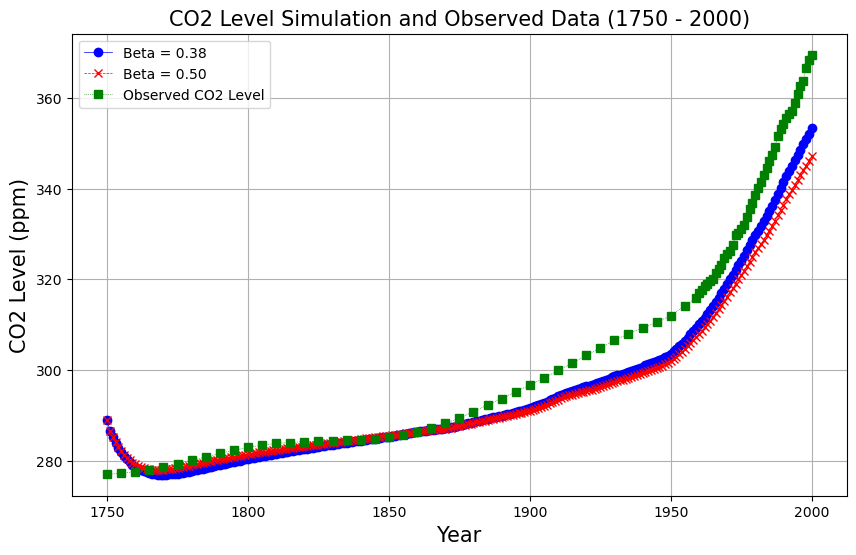

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据并从1750到2000年之间筛选
observation = pd.read_csv('atmospheric-carbon-dioxide-concentration.csv')
observation = observation[(observation['year'] >= 1750) & (observation['year'] <= 2000)]


# 创建一个绘图
plt.figure(figsize=(10, 6))

# 绘制模拟数据的CO2水平曲线
plt.plot(data['year'], data['CO2 level in ppm (beta = 0.38)'], label='Beta = 0.38', color='b', linestyle='-', marker='o',linewidth=0.5)
plt.plot(data['year'], data['CO2 level in ppm (beta = 0.50)'], label='Beta = 0.50', color='r', linestyle='--', marker='x',linewidth=0.5)

# 绘制观测数据的CO2水平曲线
plt.plot(observation['year'], observation['CO2 level in ppm'], label='Observed CO2 Level', color='g', linestyle=':', marker='s',linewidth=0.5)

# 设置图形的标题和标签
plt.title('CO2 Level Simulation and Observed Data (1750 - 2000)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('CO2 Level (ppm)', fontsize=15)

# 显示图例
plt.legend()

# 展示网格
plt.grid(True)

# 显示图形
plt.show()


In [11]:
import json
from nbformat import read, write

def extract_comments_from_cell(cell):
    comments = []
    for line in cell.source.split('\n'):
        if line.strip().startswith('#'):
            comments.append(line)
    return comments

def extract_comments_from_notebook(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = read(f, as_version=4)
    comments = []
    for cell in nb.cells:
        if cell.cell_type == 'code':
            comments.extend(extract_comments_from_cell(cell))
    return comments

# 替换为你的Jupyter Notebook文件路径
notebook_path = 'PS5.ipynb'
comments = extract_comments_from_notebook(notebook_path)

# 将批注保存到文本文件
with open('comments.txt', 'w', encoding='utf-8') as f:
    for comment in comments:
        f.write(comment + '\n')

# 打印批注
comments

['#1.1',
 '# 读取大气二氧化碳浓度数据',
 '# 加载并筛选人为源排放数据',
 '# 筛选出需要的列，并且确保二氧化碳排放数据单位为pg',
 '# 合并两个数据框，确保年份对齐',
 '# 添加大气二氧化碳浓度（ppm）列',
 '# 查看合并后的数据',
 '# 参数定义',
 '# 初始条件',
 '# 时间范围：1987到2004年',
 '#运算',
 '#1.2',
 '# 读取大气二氧化碳浓度数据',
 '# 加载并筛选人为源排放数据',
 '# 筛选出需要的列，并且确保二氧化碳排放数据单位为pg',
 '# 合并两个数据框，确保年份对齐',
 '# 添加大气二氧化碳浓度（ppm）列',
 '# 参数定义',
 '# 初始条件',
 '#运算',
 '#1.3',
 '# 筛选1987年及以后的数据',
 '# 创建一个新的图表',
 '# 绘制不考虑缓冲效应的计算结果',
 '# 绘制考虑缓冲效应的计算结果',
 '# 绘制观测值',
 '# 添加标题和标签',
 '# 添加图例',
 '# 显示图表',
 '#bonus',
 '# 读取数据',
 '#为了数据对齐，根据规律将全球排放增加1950年数据',
 '# 合并数据',
 '# 读取数据并从1950年开始筛选',
 '# 合并数据',
 '# 初始条件',
 '# 初始CO2水平设为289（1750年）',
 '# 生成年份范围',
 '# 循环处理每一年',
 '    # 获取当前年的排放和土地使用数据',
 '        # 计算CO2水平',
 '        # 计算各状态变量的变化',
 '        # 更新状态变量',
 '        # 更新CO2水平',
 '        # 存储结果到data1',
 '# 输出结果',
 '# 读取数据并从1950年开始筛选',
 '# 合并数据',
 '# 初始条件',
 '# 生成年份范围',
 '# 循环处理每一年',
 '    # 获取当前年的排放和土地使用数据',
 '        # 1950年初始值为P0',
 '        # 计算模型中的ksi和f',
 '        # 计算各状态变量的变化',
 '        # 更新状态变量',
 '        # 更新CO